## SERIES DE TIEMPO PARA PRONÓSTICOS EN ECONOMÍA Y FINANZAS
### CLASE 3: Tendencia y estacionalidad

<div style="text-align: right"> Elaborado por Jorge Guerra </div>
<div style="text-align: right"> @jguerrae18 </div>
<div style="text-align: right"> ja.guerrae@uniandes.edu.co </div>

In [4]:
from pmdarima.arima import auto_arima

In [5]:
!pip install from pmdarima

ERROR: Could not find a version that satisfies the requirement from (from versions: none)
ERROR: No matching distribution found for from


In [30]:
import warnings 
warnings.filterwarnings("ignore") #código para ignorar los anuncios de alertas

> **¿Qué haremos el día de hoy?**

El análisis se basará en una sola variable. La tasa de desempleo mensual en Colombia desde enero del año 2001 hasta el mes de noviembre del año 2019. La fuente de datos es el Departamento Administrativo Nacional de Estadística y la tasa de desempleo es la total Nacional. el código se dividirá en las siguientes secciones:

1. Modelos lineales.
2. Modelos no lineales.
3. Prónosticos fuera de muestra.
4. Criterios de selección.
5. Modelo estacionales y prónostico fuera de muestra.
6. Criterios de Selección de los modelos
---


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = pd.read_excel("desempleo.xlsx") #leer base de datos

In [33]:
df["FECHA"] = pd.to_datetime(df["FECHA"]) #convertir en formato fecha
df = df.set_index("FECHA") #fijar la fecha como un índice ( ya no como columna)

In [34]:
df.describe()

,TD,TD_SA
count,227.000000,227.000000
mean,11.380231,11.369815
std,2.221838,2.007538
min,7.270971,8.542015
25%,9.613118,9.607702
50%,11.120036,11.028638
75%,12.793838,12.385207
max,17.872714,16.552998


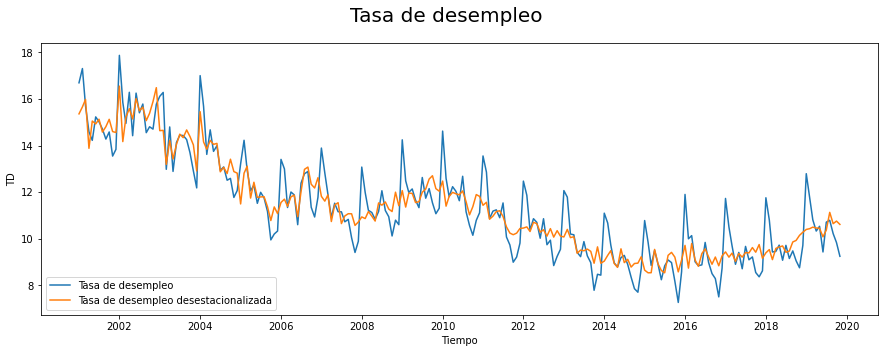

In [35]:
fig = plt.figure( figsize=(15,5))
fig.suptitle('Tasa de desempleo', fontsize=20)

plt.xlabel('Tiempo', fontsize=10)
plt.ylabel('TD', fontsize=10)
sns.lineplot(data = df, y = "TD", x = "FECHA", dashes= True, err_style ="bars")
sns.lineplot(data = df, y = "TD_SA", x = "FECHA")

plt.legend(loc='lower left', labels=['Tasa de desempleo', 'Tasa de desempleo desestacionalizada'])

fig.show()

## 1. Modelos lineales

En este punto estimaremos dos modelos:

$TD_{t}=\beta_{0}+\beta_{1}TIME_{t}$

$TD_{t}=\beta_{0}+\beta_{1}TIME_{t}+\beta_{2}TIME_{t}^{_{2}}$

Para ello crearemos la columna de tiempo y tiempo la cuadrado.

In [36]:
df["TIME"] = np.arange(1,228) #el extremo derecho del rango es abierto, asi que se le coloca un número más
df["TIME2"] = df["TIME"]**2
df

,TD,TD_SA,TIME,TIME2
FECHA,,,,
2001-01-01,16.694680,15.361924,1,1
2001-02-01,17.307023,15.662054,2,4
2001-03-01,15.705056,15.982077,3,9
2001-04-01,14.589864,13.883766,4,16
2001-05-01,14.226299,15.055094,5,25
...,...,...,...,...
2019-07-01,10.716077,10.376212,223,49729
2019-08-01,10.796328,11.136177,224,50176
2019-09-01,10.223711,10.650852,225,50625


In [37]:
dfd = df.iloc[0:216] #dentro de muestra
dfa = df.iloc[216:] #fuera de muestra

print(dfd.shape, dfa.shape)

(216, 4) (11, 4)


### Primer modelo

In [38]:

import statsmodels.api as sm 

X1 = sm.add_constant(dfd[["TIME"]])
Y = dfd["TD_SA"]

model1 = sm.OLS(Y, X1).fit() #ESTIMAR EL MODELO
print(model1.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS

                            OLS Regression Results                            
Dep. Variable:                  TD_SA   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     966.3
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           2.70e-81
Time:                        07:25:43   Log-Likelihood:                -276.46
No. Observations:                 216   AIC:                             556.9
Df Residuals:                     214   BIC:                             563.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6299      0.119    122.545      0.0

### Segundo modelo

In [39]:

X2 = sm.add_constant(dfd[["TIME", "TIME2"]])

model2 = sm.OLS(Y, X2).fit() #ESTIMAR EL MODELO
print(model2.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS


                            OLS Regression Results                            
Dep. Variable:                  TD_SA   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     720.4
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           1.60e-95
Time:                        07:25:43   Log-Likelihood:                -239.52
No. Observations:                 216   AIC:                             485.0
Df Residuals:                     213   BIC:                             495.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6917      0.152    103.124      0.0

### Gráficas de pronosticos y errores

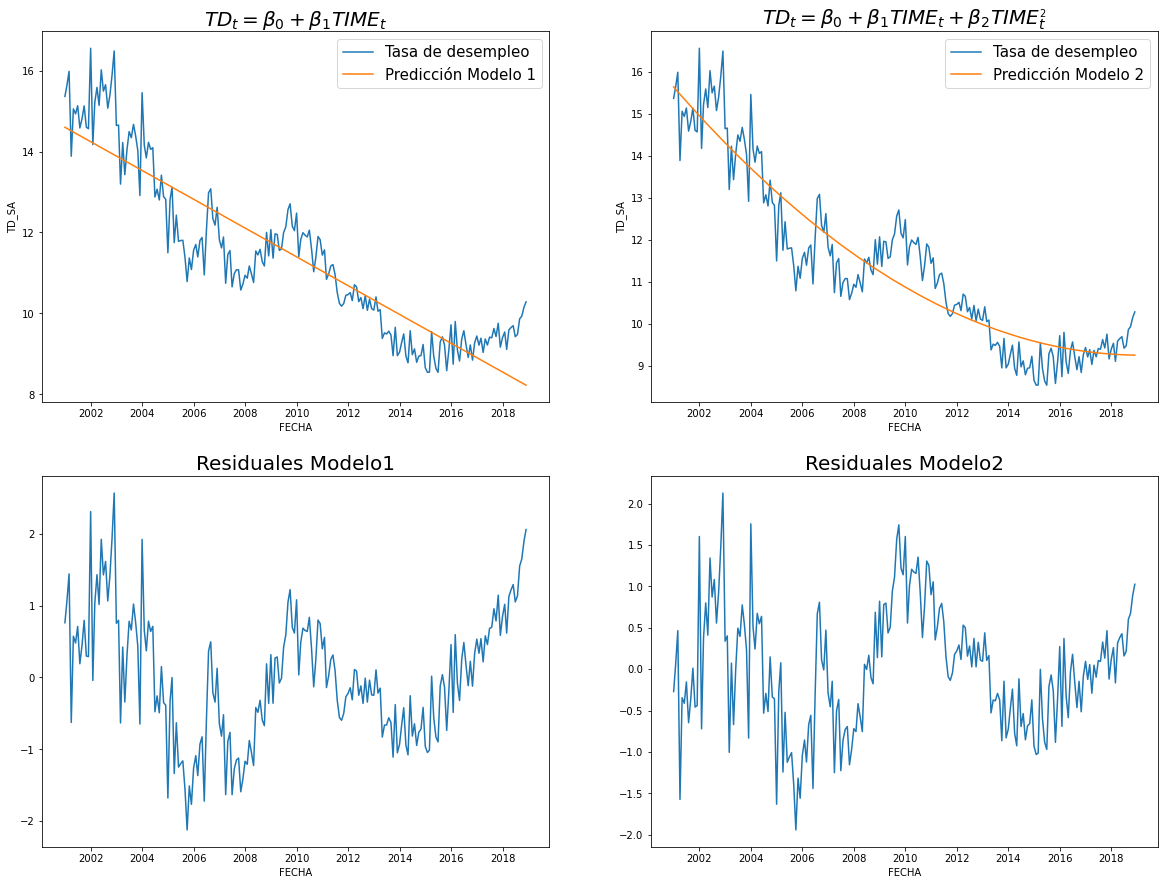

In [40]:
fig, ax =plt.subplots(2,2, figsize=(20, 15), sharex = False)

#FIG 0,0
sns.lineplot(x=dfd.index, y=dfd.TD_SA, ax = ax[0, 0])
sns.lineplot(x=dfd.index, y=model1.fittedvalues, ax = ax[0, 0])
ax[0,0].legend(labels=['Tasa de desempleo', 'Predicción Modelo 1'], prop={'size': 15})
ax[0,0].set_title(r"$TD_{t}=\beta_{0}+\beta_{1}TIME_{t}$", fontsize=20)

#FIG 0,0
sns.lineplot(x=dfd.index, y=dfd.TD_SA, ax = ax[0, 1])
sns.lineplot(x=dfd.index, y=model2.fittedvalues, ax = ax[0, 1])
ax[0,1].legend(labels=['Tasa de desempleo', 'Predicción Modelo 2'], prop={'size': 15})
ax[0,1].set_title(r"$TD_{t}=\beta_{0}+\beta_{1}TIME_{t}+\beta_{2}TIME_{t}^{_{2}}$", fontsize=20)

#FIG 0,0
sns.lineplot(x=dfd.index, y=model1.resid, ax = ax[1, 0])
ax[1,0].set_title("Residuales Modelo1", fontsize=20)

#FIG 0,0
sns.lineplot(x=dfd.index, y=model2.resid, ax = ax[1, 1])
ax[1,1].set_title("Residuales Modelo2", fontsize=20)


fig.show()

## 2. Modelos no lineales

En este punto estimaremos dos modelos:

3. $ TD_{t}=\beta _{0}e^{\beta _{1}TIME}$
4. $ ln(TD_{t})=\beta _{0}+\beta _{1}TIME_{t} $

### Modelo 3

In [41]:
from scipy import optimize

In [42]:
# (1) Normalizar con el valor máximo

Ynorm = np.array(Y)/np.max(Y)
Xnorm = np.array(dfd["TIME"])/np.max(dfd["TIME"])

# (2) Función a estimar
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

# (3) Parámetros óptimos
alpha, beta = optimize.curve_fit(func, xdata = Xnorm, ydata = Ynorm)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=0.9093207353590032, beta=-0.5795846339518083


In [43]:
Y_pred3 = func(Xnorm, alpha, beta) * np.max(Y) #volver a niveles
Errores_3 = np.array(Y) - np.array(Y_pred3)

Fuente : https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.05-Least-Square-Regression-for-Nonlinear-Functions.html

### Modelo 4

In [44]:
LogY = np.log(Y)
X4 = sm.add_constant(dfd[["TIME"]])
model4 = sm.OLS(LogY, X4).fit() #ESTIMAR EL MODELO
print(model4.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS

                            OLS Regression Results                            
Dep. Variable:                  TD_SA   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1099.
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           2.98e-86
Time:                        07:25:45   Log-Likelihood:                 267.85
No. Observations:                 216   AIC:                            -531.7
Df Residuals:                     214   BIC:                            -525.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6955      0.010    280.603      0.0

In [45]:
Y_pred4 = np.exp(model4.fittedvalues)
Errores_4 = np.array(Y) - np.array(Y_pred4)

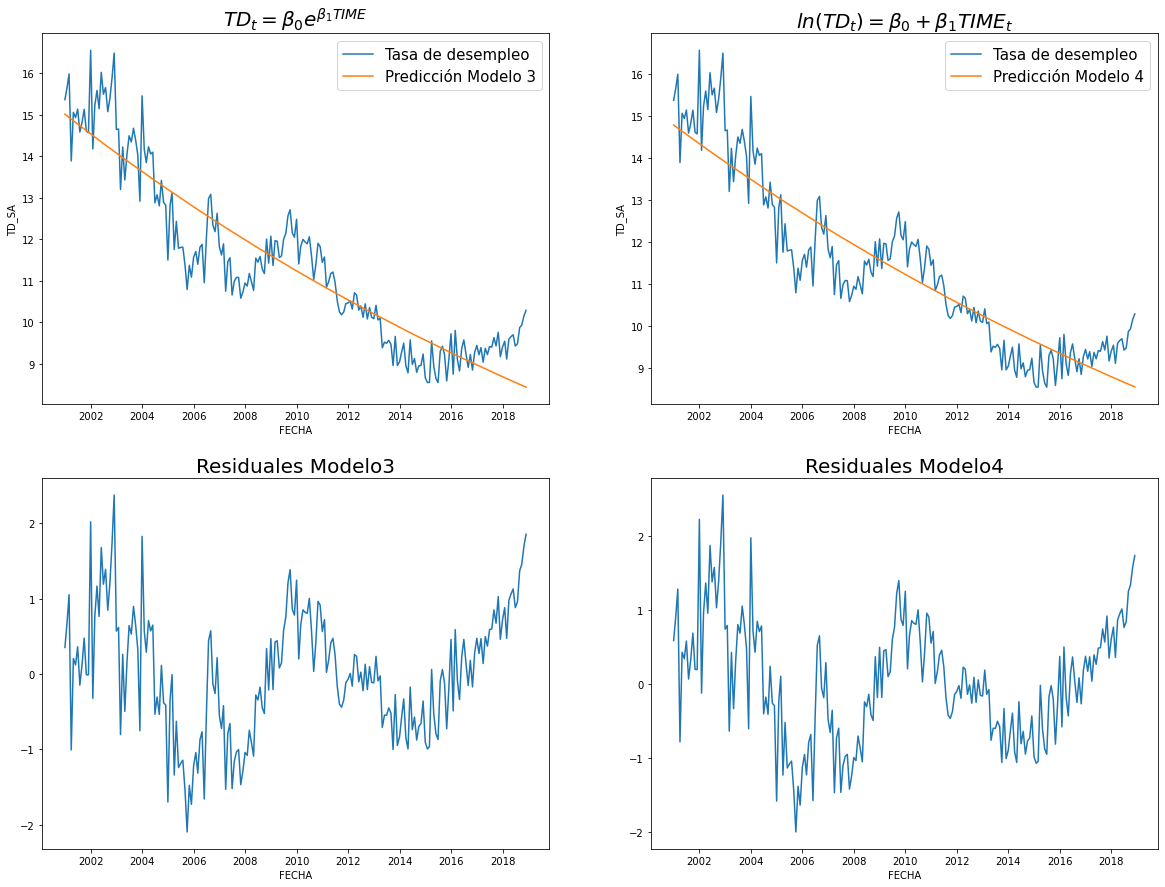

In [46]:
fig, ax =plt.subplots(2,2, figsize=(20, 15), sharex = False)

#FIG 0,0
sns.lineplot(x=dfd.index, y=dfd.TD_SA, ax = ax[0, 0])
sns.lineplot(x=dfd.index, y=Y_pred3, ax = ax[0, 0])
ax[0,0].legend(labels=['Tasa de desempleo', 'Predicción Modelo 3'], prop={'size': 15})
ax[0,0].set_title(r"$TD_{t}=\beta _{0}e^{\beta _{1}TIME}$", fontsize=20)

#FIG 0,0
sns.lineplot(x=dfd.index, y=dfd.TD_SA, ax = ax[0, 1])
sns.lineplot(x=dfd.index, y=Y_pred4, ax = ax[0, 1])
ax[0,1].legend(labels=['Tasa de desempleo', 'Predicción Modelo 4'], prop={'size': 15})
ax[0,1].set_title(r"$ln(TD_{t})=\beta _{0}+\beta _{1}TIME_{t} }$", fontsize=20)

#FIG 0,0
sns.lineplot(x=dfd.index, y=Errores_3, ax = ax[1, 0])
ax[1,0].set_title("Residuales Modelo3", fontsize=20)

#FIG 0,0
sns.lineplot(x=dfd.index, y=Errores_4, ax = ax[1, 1])
ax[1,1].set_title("Residuales Modelo4", fontsize=20)


fig.show()

## 3. Predicción fuera de muestra

In [47]:
from scipy import stats

In [48]:
X1a = dfa[["TIME"]]
X1a = sm.add_constant(X1a)

X2a = dfa[["TIME", "TIME2"]]
X2a = sm.add_constant(X2a)

X4a = dfa[["TIME"]]
X4a = sm.add_constant(X4a)

In [49]:
Y1p = model1.predict(X1a)
Y1p_UP = Y1p + stats.norm.ppf(0.975)*np.std(model1.resid)
Y1p_D = Y1p - stats.norm.ppf(0.975)*np.std(model1.resid)

Y2p = model2.predict(X2a)
Y2p_UP = Y2p + stats.norm.ppf(0.975)*np.std(model2.resid)
Y2p_D = Y2p - stats.norm.ppf(0.975)*np.std(model2.resid)

Y4p = np.exp(model4.predict(X4a))
Y4p_UP = Y4p + stats.norm.ppf(0.975)*np.std(Errores_4)
Y4p_D = Y4p - stats.norm.ppf(0.975)*np.std(Errores_4)


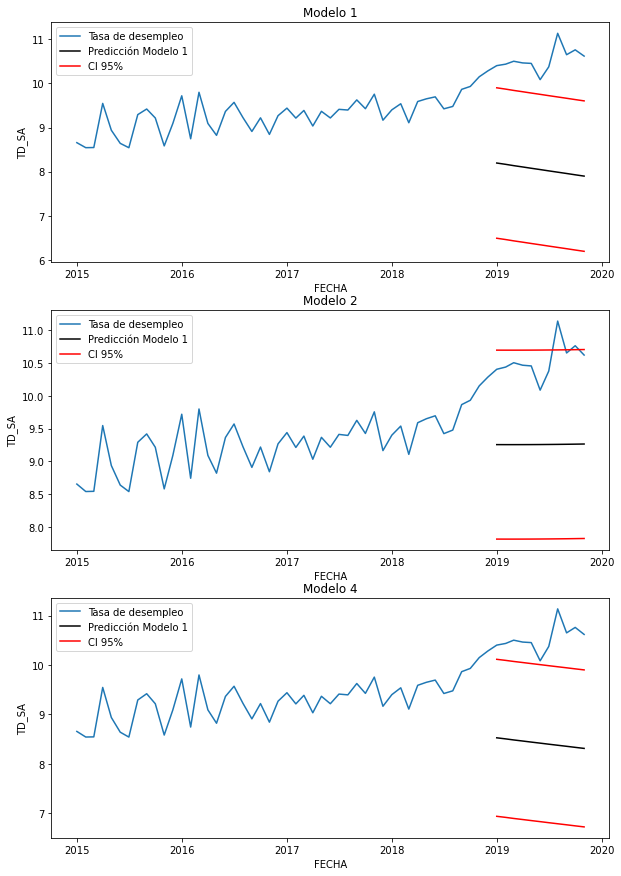

In [50]:
fig, ax =plt.subplots(3,1, figsize=(10, 15), sharex = False)

#FIG 0,0
sns.lineplot(x=df.index[168:], y=df.iloc[168:].TD_SA, ax = ax[0])
sns.lineplot(x=Y1p.index, y=Y1p, color = "black", ax = ax[0])
sns.lineplot(x=Y1p.index, y=Y1p_UP, color = "red", ax = ax[0])
sns.lineplot(x=Y1p.index, y=Y1p_D, color = "red", ax = ax[0])

ax[0].legend(labels=['Tasa de desempleo', 'Predicción Modelo 1', "CI 95%"], prop={'size': 10})
ax[0].set_title(r"Modelo 1", fontsize=12)

# #FIG 0,0
sns.lineplot(x=df.index[168:], y=df.iloc[168:].TD_SA, ax = ax[1])
sns.lineplot(x=Y2p.index, y=Y2p, color = "black", ax = ax[1])
sns.lineplot(x=Y2p.index, y=Y2p_UP, color = "red", ax = ax[1])
sns.lineplot(x=Y2p.index, y=Y2p_D, color = "red", ax = ax[1])

ax[1].legend(labels=['Tasa de desempleo', 'Predicción Modelo 1', "CI 95%"], prop={'size': 10})
ax[1].set_title(r"Modelo 2", fontsize=12)


# #FIG 0,0
sns.lineplot(x=df.index[168:], y=df.iloc[168:].TD_SA, ax = ax[2])
sns.lineplot(x=Y4p.index, y=Y4p, color = "black", ax = ax[2])
sns.lineplot(x=Y4p.index, y=Y4p_UP, color = "red", ax = ax[2])
sns.lineplot(x=Y4p.index, y=Y4p_D, color = "red", ax = ax[2])

ax[2].legend(labels=['Tasa de desempleo', 'Predicción Modelo 1', "CI 95%"], prop={'size': 10})
ax[2].set_title(r"Modelo 4", fontsize=12)


fig.show()

## 4. Criterios de Selección: Modelos 1, 2 y 4

In [51]:
l1 = [model1.aic, model1.bic] 
l2 = [model2.aic, model2.bic]
l4 = [np.abs(model4.aic), np.abs(model4.bic)] 
pd.DataFrame(data = zip (l1, l2, l4), index = ["AIC","SIC"], columns = ["Model1", "Model2", "Model4"]) 

,Model1,Model2,Model4
AIC,556.912077,485.039108,531.708981
SIC,563.662634,495.164943,524.958424


## 5. Modelos estacionales

Para incluir el efecto estacional observado en la tasa de desempleo, estimamos el siguiente modelo:

5. $TD_{t}=\beta _{0}+\beta _{1}TIME_{t}+\beta _{2}TIME_{t}^{_{2}}+\sum_{i=1}^{s}\gamma _{i}D_{it} $


In [69]:
dfd["MES"] = dfd.index
dfd["MES"] = dfd["MES"].dt.month

In [53]:
meses = pd.get_dummies(dfd["MES"])
meses

,1,2,3,4,5,6,7,8,9,10,11,12
FECHA,,,,,,,,,,,,
2001-01-01,1,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,0,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,0,0,0,0,0,0,0,1,0,0,0,0
2018-09-01,0,0,0,0,0,0,0,0,1,0,0,0
2018-10-01,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
X5_T = dfd[["TIME", "TIME2"]]
X5_M = meses.drop(columns = 1)
X5 = pd.concat([X5_T, X5_M], axis = 1)
X5 = sm.add_constant(X5)

model5 = sm.OLS(dfd["TD"], X5).fit() #ESTIMAR EL MODELO
print(model5.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS

                            OLS Regression Results                            
Dep. Variable:                     TD   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     121.4
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           7.64e-88
Time:                        07:25:49   Log-Likelihood:                -247.05
No. Observations:                 216   AIC:                             522.1
Df Residuals:                     202   BIC:                             569.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7360      0.238     74.494      0.0

Text(0.5, 1.0, 'Residuales Modelo5')

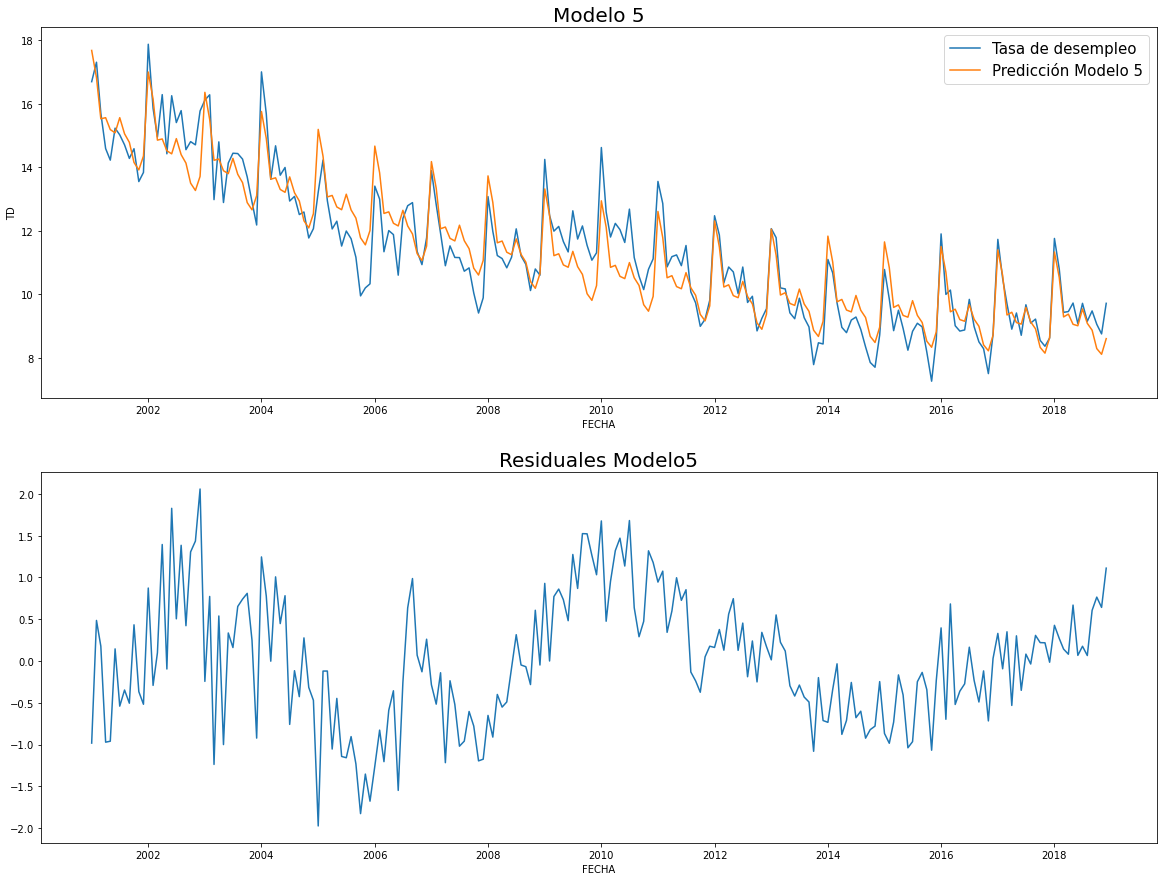

In [55]:
fig, ax =plt.subplots(2,1, figsize=(20, 15), sharex = False)

#FIG 0,0
sns.lineplot(x=dfd.index, y=dfd.TD, ax = ax[0])
sns.lineplot(x=dfd.index, y=model5.fittedvalues, ax = ax[0])
ax[0].legend(labels=['Tasa de desempleo', 'Predicción Modelo 5'], prop={'size': 15})
ax[0].set_title(r"Modelo 5", fontsize=20)

#FIG 0,0
sns.lineplot(x=dfd.index, y=model5.resid, ax = ax[1])
ax[1].set_title("Residuales Modelo5", fontsize=20)

### Estimación fuera de muestra

In [56]:
dfa["MES"] = dfa.index
dfa["MES"] = dfa["MES"].dt.month
mesesa = pd.get_dummies(dfa["MES"])
mesesa[12] = 0

In [57]:
X5a_T = dfa[["TIME", "TIME2"]]
X5a_M = mesesa.drop(columns = 1)
X5a = pd.concat([X5a_T, X5a_M], axis = 1)
X5a = sm.add_constant(X5a)

In [58]:
Y5p = model5.predict(X5a)
Y5p_UP = Y5p + stats.norm.ppf(0.975)*np.std(model5.resid)
Y5p_D = Y5p - stats.norm.ppf(0.975)*np.std(model5.resid)

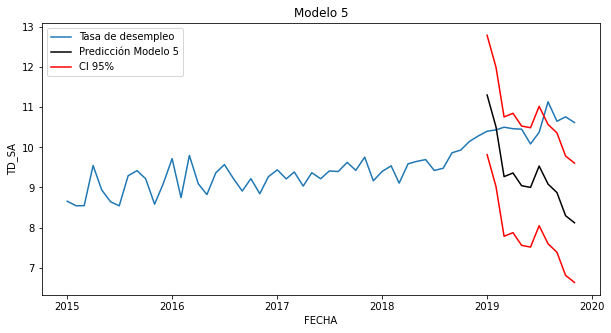

In [59]:
plt.figure(figsize=(10, 5))

#FIG 0,0
sns.lineplot(x=df.index[168:], y=df.iloc[168:].TD_SA)
sns.lineplot(x=Y5p.index, y=Y5p, color = "black")
sns.lineplot(x=Y5p.index, y=Y5p_UP, color = "red")
sns.lineplot(x=Y5p.index, y=Y5p_D, color = "red")

plt.legend(labels=['Tasa de desempleo', 'Predicción Modelo 5', "CI 95%"], prop={'size': 10})
plt.title(r"Modelo 5", fontsize=12)
fig.show()

## 6. Criterios de información para la selección de modelos

In [60]:
l1 = [model1.aic, model1.bic] 
l2 = [model2.aic, model2.bic]
l4 = [np.abs(model4.aic), np.abs(model4.bic)] 
l5 = [model5.aic, model5.bic]

pd.DataFrame(data = zip (l1, l2, l4, l5), index = ["AIC","BIC"], columns = ["Model1", "Model2", "Model4", "Model5"]) 

#AGREGAR MSE FUERA DE MUESTRA

,Model1,Model2,Model4,Model5
AIC,556.912077,485.039108,531.708981,522.099254
BIC,563.662634,495.164943,524.958424,569.353151


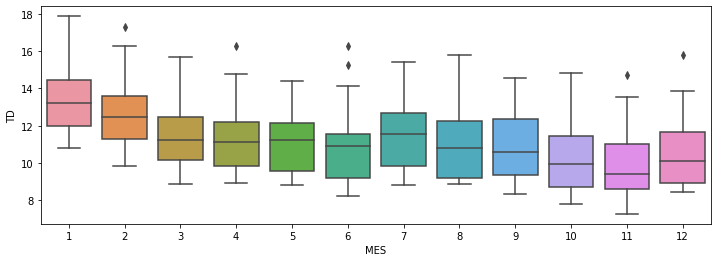

In [61]:
#ADICIONAL

df["MES"] = df.index
df["MES"] = df["MES"].dt.month

fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='MES',y='TD',data=df,ax=ax)
plt.show()

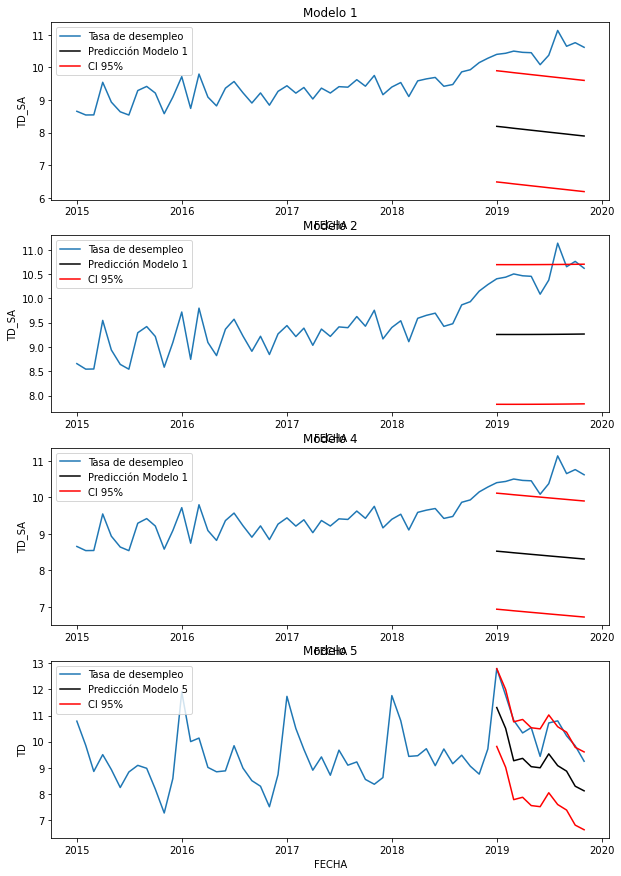

In [71]:
##GRÁFICA COMPARACIÓN REPRESENTACIÓN DE PRÓNOSTICOS

fig, ax =plt.subplots(4,1, figsize=(10, 15), sharex = False)

#FIG 0,0
sns.lineplot(x=df.index[168:], y=df.iloc[168:].TD_SA, ax = ax[0])
sns.lineplot(x=Y1p.index, y=Y1p, color = "black", ax = ax[0])
sns.lineplot(x=Y1p.index, y=Y1p_UP, color = "red", ax = ax[0])
sns.lineplot(x=Y1p.index, y=Y1p_D, color = "red", ax = ax[0])

ax[0].legend(labels=['Tasa de desempleo', 'Predicción Modelo 1', "CI 95%"], prop={'size': 10})
ax[0].set_title(r"Modelo 1", fontsize=12)

# #FIG 0,0
sns.lineplot(x=df.index[168:], y=df.iloc[168:].TD_SA, ax = ax[1])
sns.lineplot(x=Y2p.index, y=Y2p, color = "black", ax = ax[1])
sns.lineplot(x=Y2p.index, y=Y2p_UP, color = "red", ax = ax[1])
sns.lineplot(x=Y2p.index, y=Y2p_D, color = "red", ax = ax[1])

ax[1].legend(labels=['Tasa de desempleo', 'Predicción Modelo 1', "CI 95%"], prop={'size': 10})
ax[1].set_title(r"Modelo 2", fontsize=12)


# #FIG 0,0
sns.lineplot(x=df.index[168:], y=df.iloc[168:].TD_SA, ax = ax[2])
sns.lineplot(x=Y4p.index, y=Y4p, color = "black", ax = ax[2])
sns.lineplot(x=Y4p.index, y=Y4p_UP, color = "red", ax = ax[2])
sns.lineplot(x=Y4p.index, y=Y4p_D, color = "red", ax = ax[2])

ax[2].legend(labels=['Tasa de desempleo', 'Predicción Modelo 1', "CI 95%"], prop={'size': 10})
ax[2].set_title(r"Modelo 4", fontsize=12)

##
sns.lineplot(x=df.index[168:], y=df.iloc[168:].TD, ax = ax[3])
sns.lineplot(x=Y5p.index, y=Y5p, color = "black", ax = ax[3])
sns.lineplot(x=Y5p.index, y=Y5p_UP, color = "red", ax = ax[3])
sns.lineplot(x=Y5p.index, y=Y5p_D, color = "red", ax = ax[3])

ax[3].legend(labels=['Tasa de desempleo', 'Predicción Modelo 5', "CI 95%"], prop={'size': 10})
ax[3].set_title(r"Modelo 5", fontsize=12)

fig.show()